# 비지도 학습과 데이터 전처리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 3.5 군집

## 공통

In [7]:
# %config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [8]:
from preamble import *

## 3.5.1 k-평균 군집

### 데이터 생성 및 군집

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [10]:
print(kmeans.labels_)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [11]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


### 데이터 시각화

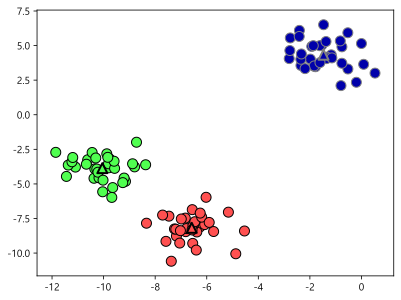

In [12]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show() # 책에는 없음

### 비교

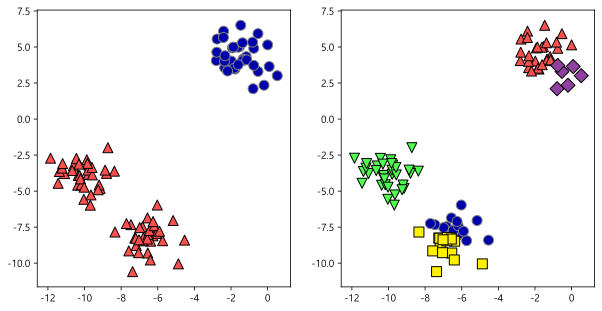

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show() # 책에는 없음

## 3.5.2. 병합 군집

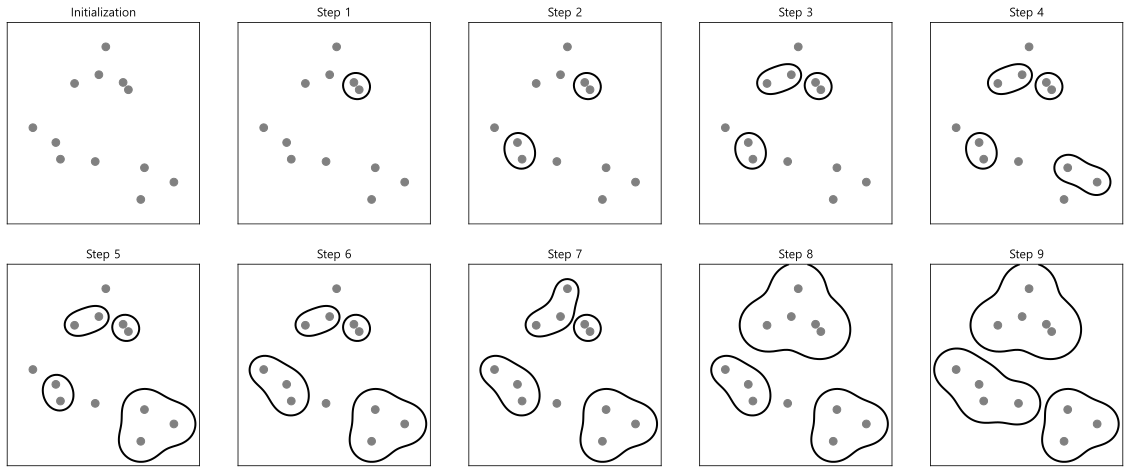

In [14]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

## 3.5.3 DBSCAN

### 데이터 생성 및 군집

In [15]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


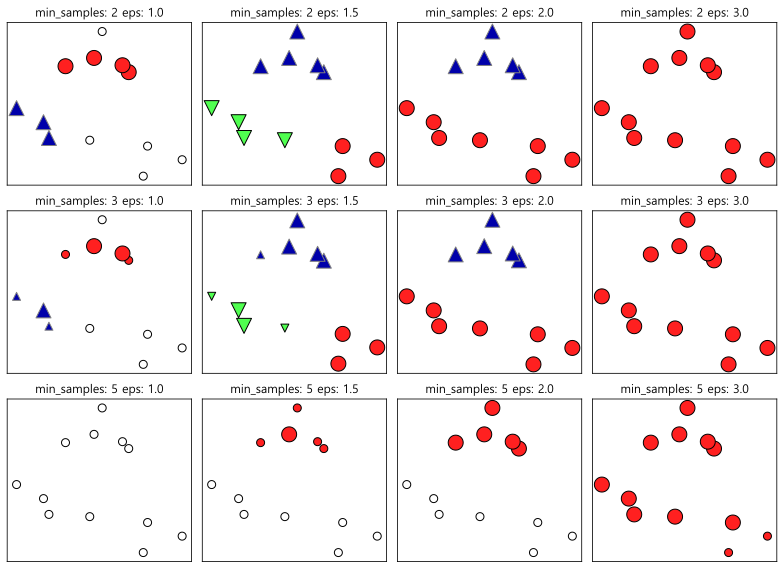

In [16]:
mglearn.plots.plot_dbscan()
plt.show()

### 데이터 생성 및 군집

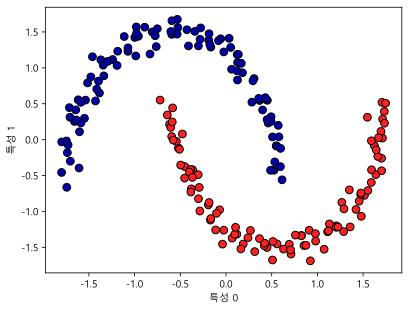

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

## 3.5.4 군집 알고리즘의 비교와 평가
### 타겟값으로 군집 평가하기

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

### GM-Q1. 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정하세요.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

### GM-Q2. 사용할 알고리즘 목록을 만드세요.

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

 ### GM-Q3. 무작위로 목록을 나누세요.

In [29]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

### 이미지로 표현하세요.

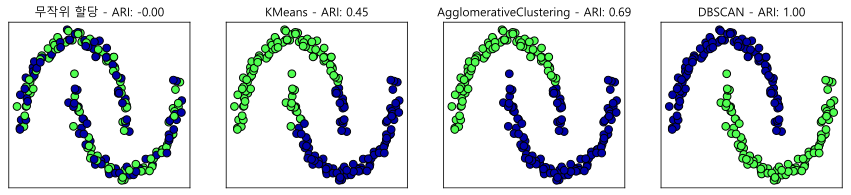

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

### 측정하세요.

In [ ]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


## 타겟값 없이 군집 평가하기

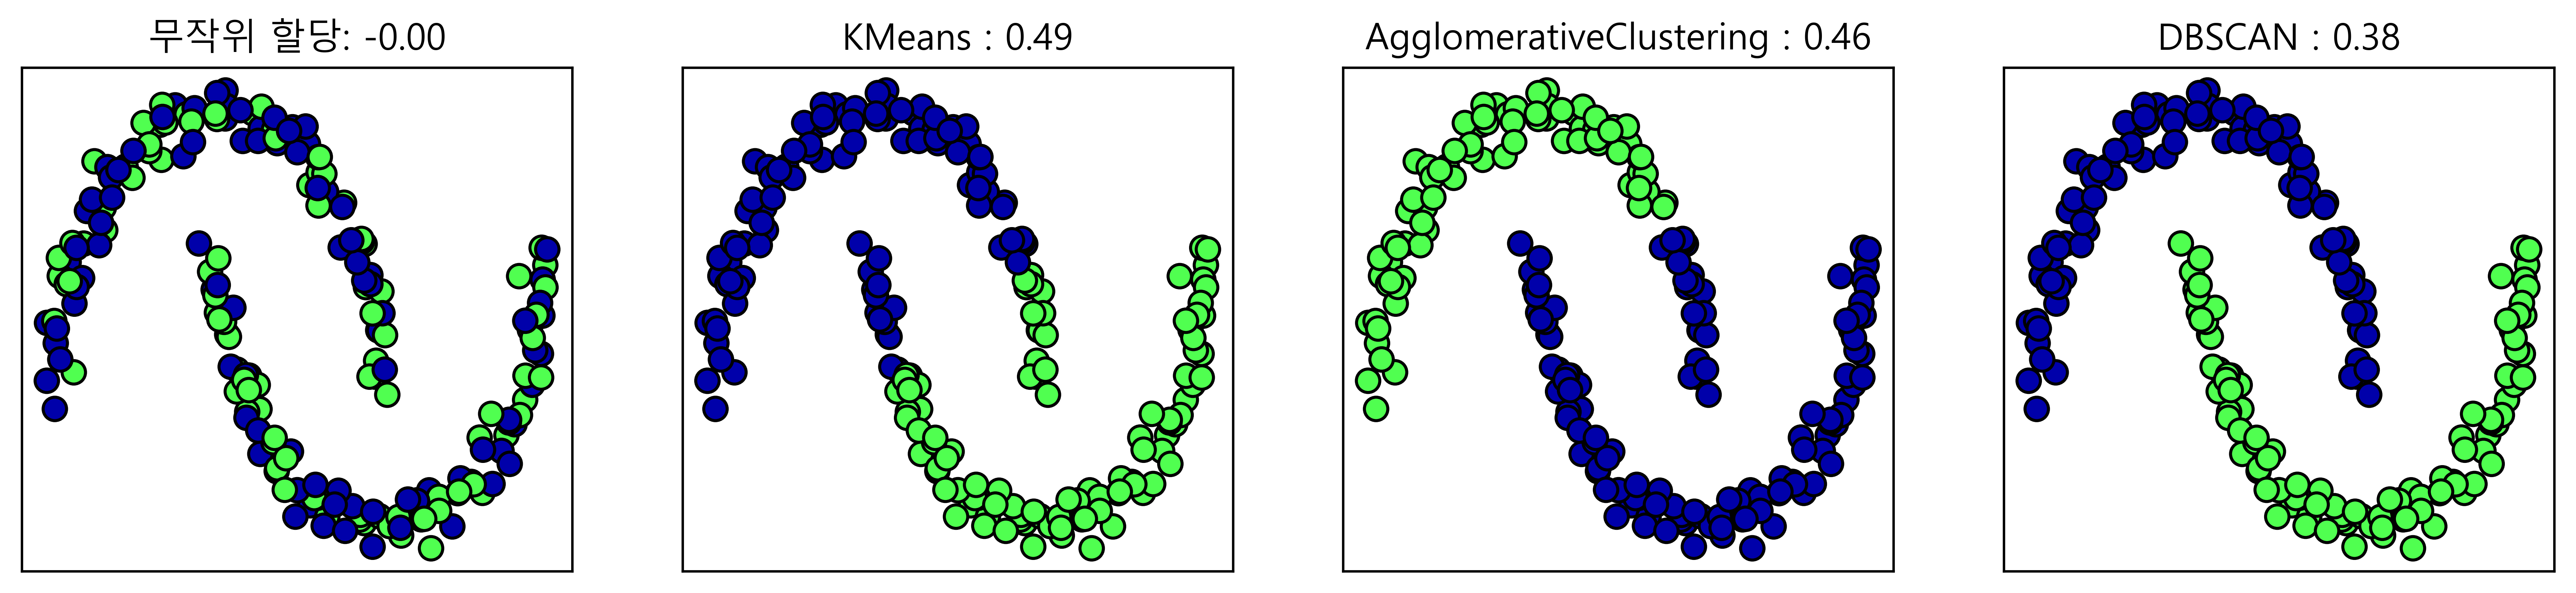

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))